## Joining Dataframes

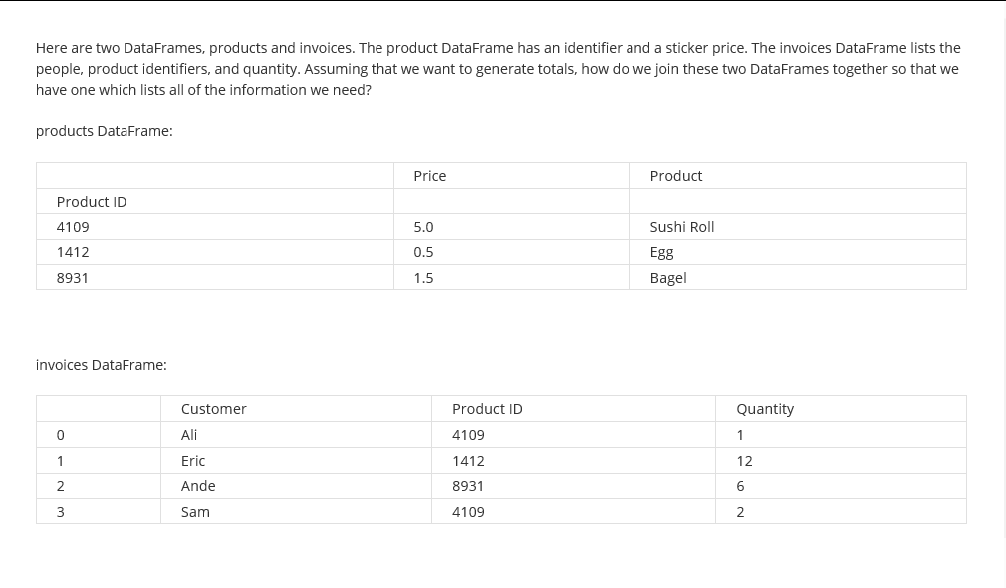

In [1]:
import pandas as pd

#creating df using list of dicts
products = pd.DataFrame([{'Poduct ID': 4109, 'Price': 5.0, 'Product': 'Sushi Roll'},
                              {'Poduct ID': 1412, 'Price': 0.5, 'Product': 'Egg'},
                              {'Poduct ID': 8931, 'Price': 1.5, 'Product': 'Bagel'}])
products = products.set_index('Poduct ID')

products

,Price,Product
Poduct ID,,
4109,5.0,Sushi Roll
1412,0.5,Egg
8931,1.5,Bagel


In [2]:
#creating a dataframe from a dictionary
df = pd.DataFrame({"Product ID": [1409, 1412, 8931, 4109], 
                  'Customer': ['Ali', 'Eric', 'Ande', 'Sam'],
                  'Quantity': [1, 12, 6, 2]})
df = df.set_index("Product ID")
df

,Customer,Quantity
Product ID,,
1409,Ali,1
1412,Eric,12
8931,Ande,6
4109,Sam,2


In [3]:
invoices = pd.DataFrame([{'Product ID': 4109, 'Customer': 'Ali', 'Quantity': 1},
                         {'Product ID': 1412, 'Customer': 'Eric', 'Quantity': 12},
                         {'Product ID': 8931, 'Customer': 'Ande', 'Quantity': 6},
                         {'Product ID': 4109, 'Customer': 'Sam', 'Quantity': 2}])
#invoices = invoices.set_index('Product ID')

invoices

,Customer,Product ID,Quantity
0,Ali,4109,1
1,Eric,1412,12
2,Ande,8931,6
3,Sam,4109,2


In [4]:
# products and invoices are already initalized.

answer = pd.merge(products, invoices, how='outer', left_index=True, right_on='Product ID')

#answer == correct_answer

In [5]:
answer['Total'] = (answer['Quantity'] * answer['Price'])
answer

,Price,Product,Customer,Product ID,Quantity,Total
0,5.0,Sushi Roll,Ali,4109,1,5.0
3,5.0,Sushi Roll,Sam,4109,2,10.0
1,0.5,Egg,Eric,1412,12,6.0
2,1.5,Bagel,Ande,8931,6,9.0


In [6]:
print(pd.merge(products, invoices, left_index=True, right_on='Product ID'))

   Price     Product Customer  Product ID  Quantity
0    5.0  Sushi Roll      Ali        4109         1
3    5.0  Sushi Roll      Sam        4109         2
1    0.5         Egg     Eric        1412        12
2    1.5       Bagel     Ande        8931         6


## Making Code Pandorable

Can you use method chaining to modify the DataFrame df in one statement to drop any entries where 'Quantity' is 0 and rename the column 'Weight' to 'Weight (oz.)'? 

In [7]:
df = pd.DataFrame({'Item': ['Pack', 'Tent', 'Sleeping Pad', 'Sleeping Bag', 'Toothbrush/Toothpaste', 'Sunscreen',
                            'Medical Kit', 'Spoon', 'Stove', 'Water Filter', 'Water Bottles', 'Pick Liner', 'Stuff Sack',
                            'Trekking Poles', 'Rain Pocho', 'Shoes', 'Hat'],
                   'Category': ['Pack', 'Shelter', 'Sleep', 'Sleep', 'Health', 'Health', 'Health', 'Kitchen', 'Kitchen',
                                'Kitchen', 'Kitchen', 'Utility', 'Utility', 'Utility', 'Clothing', 'Clothing', 'Clothing'],
                   'Quantity': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1],
                   'Weight': [33.0, 80.0, 27.0, 20.0, 2.0, 5.0, 3.7, 0.7, 20.0, 1.8, 35.0, 1.0, 1.0, 16.0, 6.0, 12.0, 2.5]})

df

,Item,Category,Quantity,Weight
0,Pack,Pack,1,33.0
1,Tent,Shelter,1,80.0
2,Sleeping Pad,Sleep,1,27.0
3,Sleeping Bag,Sleep,1,20.0
4,Toothbrush/Toothpaste,Health,1,2.0
5,Sunscreen,Health,1,5.0
6,Medical Kit,Health,1,3.7
7,Spoon,Kitchen,1,0.7
8,Stove,Kitchen,1,20.0
9,Water Filter,Kitchen,1,1.8


                       Category  Quantity  Weight (oz.)
Item                                                   
Pack                       Pack         1          33.0
Tent                    Shelter         1          80.0
Sleeping Pad              Sleep         1          27.0
Sleeping Bag              Sleep         1          20.0
Toothbrush/Toothpaste    Health         1           2.0
Sunscreen                Health         1           5.0
Medical Kit              Health         1           3.7
Spoon                   Kitchen         1           0.7
Stove                   Kitchen         1          20.0
Water Filter            Kitchen         1           1.8
Water Bottles           Kitchen         2          35.0
Pack Liner              Utility         1           1.0
Stuff Sack              Utility         1           1.0
Trekking Poles          Utility         1          16.0
Rain Poncho            Clothing         1           6.0
Shoes                  Clothing         1          12.0
Hat                    Clothing         1          

In [8]:
print(df[df['Quantity']!= 0].rename(columns={'Weight': 'Weight (oz.)'}))

                     Item  Category  Quantity  Weight (oz.)
0                    Pack      Pack         1          33.0
1                    Tent   Shelter         1          80.0
2            Sleeping Pad     Sleep         1          27.0
3            Sleeping Bag     Sleep         1          20.0
4   Toothbrush/Toothpaste    Health         1           2.0
5               Sunscreen    Health         1           5.0
6             Medical Kit    Health         1           3.7
7                   Spoon   Kitchen         1           0.7
8                   Stove   Kitchen         1          20.0
9            Water Filter   Kitchen         1           1.8
10          Water Bottles   Kitchen         2          35.0
11             Pick Liner   Utility         1           1.0
12             Stuff Sack   Utility         1           1.0
13         Trekking Poles   Utility         1          16.0
14             Rain Pocho  Clothing         1           6.0
15                  Shoes  Clothing     

In [12]:
print(df.drop(df[df['Quantity'] == 0].index).rename(columns={'Weight': 'Weight (oz.)'}))

                     Item  Category  Quantity  Weight (oz.)
0                    Pack      Pack         1          33.0
1                    Tent   Shelter         1          80.0
2            Sleeping Pad     Sleep         1          27.0
3            Sleeping Bag     Sleep         1          20.0
4   Toothbrush/Toothpaste    Health         1           2.0
5               Sunscreen    Health         1           5.0
6             Medical Kit    Health         1           3.7
7                   Spoon   Kitchen         1           0.7
8                   Stove   Kitchen         1          20.0
9            Water Filter   Kitchen         1           1.8
10          Water Bottles   Kitchen         2          35.0
11             Pick Liner   Utility         1           1.0
12             Stuff Sack   Utility         1           1.0
13         Trekking Poles   Utility         1          16.0
14             Rain Pocho  Clothing         1           6.0
15                  Shoes  Clothing     

### Groupby
Looking at our backpacking equipment DataFrame, suppose we are interested in finding our total weight for each category. Use groupby to group the dataframe, and apply a function to calculate the total weight (Weight x Quantity) by category.

In [15]:
print(df.groupby('Category').apply(lambda df, a, b: sum(df[a] * df[b]), 'Weight', 'Quantity'))

Category
Clothing    20.5
Health      10.7
Kitchen     92.5
Pack        33.0
Shelter     80.0
Sleep       47.0
Utility     18.0
dtype: float64


In [16]:
# Or alternatively without using a lambda:
def totalweight(df, w, q):
    return sum(df[w] * df[q])

print(df.groupby('Category').apply(totalweight, 'Weight', 'Quantity'))

Category
Clothing    20.5
Health      10.7
Kitchen     92.5
Pack        33.0
Shelter     80.0
Sleep       47.0
Utility     18.0
dtype: float64


### Scales

In [21]:
#try casting this series to categorical with the ordering Low < Medium < High
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])
s

0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: object

In [24]:
s.astype('category', categories=['Low', 'Medium', 'High'], ordered=True)

0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: category
Categories (3, object): [Low < Medium < High]

In [26]:
#suppose we have a series that holds height data for jacket wearers. Use pd.cut to bin this data into 3 bins
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])

In [27]:
pd.cut(s, 3)

0     (167.978, 175.333]
1     (175.333, 182.667]
2     (167.978, 175.333]
3       (182.667, 190.0]
4     (167.978, 175.333]
5       (182.667, 190.0]
6     (175.333, 182.667]
7     (175.333, 182.667]
8     (167.978, 175.333]
9     (167.978, 175.333]
10    (175.333, 182.667]
11    (175.333, 182.667]
12    (175.333, 182.667]
13    (167.978, 175.333]
dtype: category
Categories (3, interval[float64]): [(167.978, 175.333] < (175.333, 182.667] < (182.667, 190.0]]

In [28]:
#you can also add labels for the sizes [Small < Medium < Large]
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

### Pivot Tables
DataFrame with price and ratings for different bikes, broken down by manufacturer and type of bicycle.
Create a pivot table that shows the mean price and mean rating for every 'Manufacturer' / 'Bike Type' combination.

In [29]:
bikes = pd.DataFrame({'Bike Type': ['Mountain', 'Mountain', 'Road', 'Road', 'Mountain', 'Mountain', 'Road', 
                                    'Road', 'Mountain', 'Mountain', 'Road', 'Road'], 
                      'Manufacturer': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                      'Price': [400, 600, 400, 450, 300, 250, 400, 500, 400, 500, 800, 950],
                      'Rating': [8, 9, 4, 4, 6, 5, 4, 6, 5, 6, 9, 10]})
bikes

,Bike Type,Manufacturer,Price,Rating
0,Mountain,A,400,8
1,Mountain,A,600,9
2,Road,A,400,4
3,Road,A,450,4
4,Mountain,B,300,6
5,Mountain,B,250,5
6,Road,B,400,4
7,Road,B,500,6
8,Mountain,C,400,5
9,Mountain,C,500,6


In [43]:
print(pd.pivot_table(bikes, index=['Manufacturer','Bike Type']))

                        Price  Rating
Manufacturer Bike Type               
A            Mountain     500     8.5
             Road         425     4.0
B            Mountain     275     5.5
             Road         450     5.0
C            Mountain     450     5.5
             Road         875     9.5
